# GPU Monitor

In [1]:
#https://developer.nvidia.com/blog/profiling-and-optimizing-deep-neural-networks-with-dlprof-and-pyprof/
#nvidia-smi
#nvidia-smi dmon

## Import Libs

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(1)

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import cv2
from math import sin, cos, pi
from time import strftime
from datetime import datetime

In [3]:
train_data = pd.read_csv('data/training.csv') 
test_data = pd.read_csv('data/test.csv') 
Id_data = pd.read_csv('data/IdLookupTable.csv') 

# MODEL EXAMPLE
https://www.tensorflow.org/tutorials/images/cnn

In [4]:
from tensorflow import keras
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import random
import tensorflow as tf



In [5]:
epochs = 100
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

#make some random data
reset_random_seeds()

In [6]:
model = Sequential()

#Block 1
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 2
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','accuracy'])

In [8]:
train_data = pd.read_csv('data/training.csv')

images = []
y_train = []

print(len(train_data))
train_data = train_data.fillna(method = 'ffill')
for idx, sample in train_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_train = np.array(images)

7049


In [9]:
training = train_data.drop('Image',axis = 1)

y_train = []
for idx, sample in training.iterrows():
    y = training.iloc[idx,:]
    y_train.append(y)    
y_train = np.array(y_train,dtype = 'float')

In [10]:
start_time = datetime.now()
history = model.fit(X_train,y_train,epochs = epochs,batch_size = 450,validation_split = 0.2)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
13/13 [==============================] - 5s 389ms/step - loss: 435.7756 - mae: 14.5010 - accuracy: 0.2328 - val_loss: 12763.1602 - val_mae: 94.1751 - val_accuracy: 0.0113
Epoch 2/100
13/13 [==============================] - 4s 320ms/step - loss: 86.3361 - mae: 7.2763 - accuracy: 0.3245 - val_loss: 9429.3740 - val_mae: 80.3166 - val_accuracy: 0.6844
Epoch 3/100
13/13 [==============================] - 4s 317ms/step - loss: 54.0123 - mae: 5.7686 - accuracy: 0.3760 - val_loss: 1786.0959 - val_mae: 31.5672 - val_accuracy: 0.6794
Epoch 4/100
13/13 [==============================] - 4s 317ms/step - loss: 43.2087 - mae: 5.1558 - accuracy: 0.3958 - val_loss: 914.6425 - val_mae: 21.9958 - val_accuracy: 0.6156
Epoch 5/100
13/13 [==============================] - 4s 318ms/step - loss: 39.8249 - mae: 4.9418 - accuracy: 0.4279 - val_loss: 536.3300 - val_mae: 16.9828 - val_accuracy: 0.6681
Epoch 6/100
13/13 [==============================] - 4s 317ms/step - loss: 34.8524 - mae: 4.6252 - 

13/13 [==============================] - 4s 322ms/step - loss: 9.1179 - mae: 2.2969 - accuracy: 0.7758 - val_loss: 7.7512 - val_mae: 2.0446 - val_accuracy: 0.7539
Epoch 92/100
13/13 [==============================] - 4s 320ms/step - loss: 12.6268 - mae: 2.7132 - accuracy: 0.7826 - val_loss: 9.5449 - val_mae: 2.2395 - val_accuracy: 0.7560
Epoch 93/100
13/13 [==============================] - 4s 319ms/step - loss: 9.4760 - mae: 2.3279 - accuracy: 0.7778 - val_loss: 5.4547 - val_mae: 1.5775 - val_accuracy: 0.7567
Epoch 94/100
13/13 [==============================] - 4s 318ms/step - loss: 9.1386 - mae: 2.2927 - accuracy: 0.7819 - val_loss: 9.9657 - val_mae: 2.2727 - val_accuracy: 0.7631
Epoch 95/100
13/13 [==============================] - 4s 329ms/step - loss: 8.8381 - mae: 2.2497 - accuracy: 0.7867 - val_loss: 5.3882 - val_mae: 1.5702 - val_accuracy: 0.7525
Epoch 96/100
13/13 [==============================] - 4s 334ms/step - loss: 10.1889 - mae: 2.4227 - accuracy: 0.7801 - val_loss: 6.1

221/221 - 2s - loss: 4.6625 - mae: 1.6085 - accuracy: 0.8573


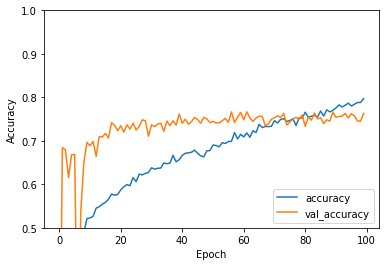

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc, acc = model.evaluate(X_train,y_train, verbose=2)

In [12]:

model_name = "data/models/model_2block_2FC_epochs_{}_".format(epochs) +strftime("%Y-%m-%d_%H-%M-%S")+".keras"
model.save(model_name)

In [13]:
model_name

'data/models/model_2block_2FC_epochs_100_2020-12-04_23-17-41.keras'

In [14]:
# model_name = "model_simple_nn_2020-11-13_06-57-10.keras"
model = keras.models.load_model(model_name)

In [15]:
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
images = []

test_data = pd.read_csv('data/test.csv') 
for idx, sample in test_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_predict = np.array(images)

# Make Predictions

In [17]:
Id_data = pd.read_csv('data/IdLookupTable.csv') 

test_preds = model.predict(X_predict)
test_preds[test_preds > 96] = 96

image_id = list(Id_data["ImageId"]-1)
mark_names = list(Id_data['FeatureName'])
mark_id = [mark_names.index(x) for x in mark_names]

req_predictions = [test_preds[x,y] for x,y in zip(image_id,mark_id)]

rowid = pd.Series(Id_data['RowId'], name = 'RowId')
loc = pd.Series(req_predictions, name = 'Location')
submission = pd.concat([rowid, loc], axis = 1)
submission.to_csv('data/2block_2FC_submission.csv',index = False)